In [1]:
"""
Orbital Models of High Velocity Stars in Omega Centauri
Using Octofitter
"""

"Orbital Models of High Velocity Stars in Omega Centauri\nUsing Octofitter\n"

In [1]:
# Environment variables
ENV["JULIA_NUM_THREADS"] = "auto"
ENV["OCTOFITTERPY_AUTOLOAD_EXTENSIONS"] = "yes"

# Imports
using Octofitter
using Octofitter: @variables, System
using CairoMakie
using PairPlots
using Distributions
using Unitful
using UnitfulAstro
using LinearAlgebra
using Octofitter  
using Statistics
using Dates
using Pigeons
using PrettyTables
using Printf
using DataFrames
using OctofitterRadialVelocity

push!(LOAD_PATH, raw"C:\Users\macke\OneDrive - Saint Marys University\Summer Research 2025\orbits\julia_collection")
using octo_utils_julia  

┌ Info: Welcome to Octofitter v7.0.0 🐙
│ Check for new releases: https://github.com/sefffal/Octofitter.jl/releases/
└ Read the documentation: https://sefffal.github.io/Octofitter.jl/v7.0.0
┌ Info: Note: Julia was started with only one thread. Some models may run faster if you supply multiple threads.
│ To enable multithreading, run:
│ 
│         julia --threads=auto
│ 
└ or set the environment variable `JULIA_NUM_THREADS=auto` and restart julia.


In [2]:
"""
Data and Priors 
""" 
# "observable based priors" of K. O'Neil 2019 "Improving Orbit Estimates for Incomplete Orbits with a New Approach to Priors: with Applications from Black Holes to Planets".
# Supply Uniform priors on all Campbell orbital parameters and a Uniform prior on Period (not semi-major axis). 
# This period prior has a significant impact in the fit and recommendations for its range were not published in the original paper.
# Paper: https://arxiv.org/pdf/1809.05490


# === Select stars and time config ===
star_names = ["A", "B", "C", "D", "E", "F", "G"]
epoch = 2010.0
dt = 1.0

# Dictionaries to store simulation results and likelihood objects
epochs_mjd = Dict{String, Any}()
ra_rel = Dict{String, Any}()
dec_rel = Dict{String, Any}()
ra_errs = Dict{String, Any}()
dec_errs = Dict{String, Any}()
astrom_likelihoods = Dict{String, Any}()

# === Simulate astrometry and create likelihood objects ===
for name in star_names
    star = octo_utils_julia.stars[name]

    emjd, ra_r, dec_r, ra_e, dec_e = octo_utils_julia.simulate_astrometry(star, epoch, dt)

    epochs_mjd[name] = emjd
    ra_rel[name] = ra_r
    dec_rel[name] = dec_r
    ra_errs[name] = ra_e
    dec_errs[name] = dec_e

    # Build tuple of observations, one per epoch
    obs = ntuple(i -> (
        epoch = emjd[i],
        ra = ra_r[i],
        dec = dec_r[i],
        σ_ra = ra_e[i],
        σ_dec = dec_e[i],
        cor = 0.0
    ), length(emjd))

    astrom_likelihoods[name] = PlanetRelAstromLikelihood(obs; name = name)
end

# === Define companions ===
planet_1 = Planet(
    name = "A",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["A"])],
    variables = @variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
    end
)
planet_3 = Planet(
    name = "C",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["C"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M) 
    end
)

planet_4 = Planet(
    name = "D",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["D"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
    end
)

planet_5 = Planet(
    name = "E",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["E"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)  
    end
)

planet_6 = Planet(
    name = "F",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["F"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M) 
    end
)

# Note stars B and G were not used in the Hablerle et al. 2024 paper

# planet_2 = Planet(
#     name = "B",
#     basis = Visual{KepOrbit},
#     likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["B"])],
#     variables = @variables begin
#           M = system.M    # Host mass [solar masses]
#           P ~ Uniform(1, 200000)         # Period in yrs
#           a = cbrt(M * P^2)     # Semi-Major axis in AU
#           e ~ Uniform(0.0, 0.99)         # Eccentricity
#           i ~ Sine()                     # Inclination [rad]
#           ω ~ UniformCircular()          # Argument of periastron [rad]
#           Ω ~ UniformCircular()          # Longitude of ascending node [rad]
#           θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
#           tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
# )

#
# planet_7 = Planet(
#     name = "G",
#     basis = Visual{KepOrbit},
#     likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["G"])],
#     variables = @variables begin
#           M = system.M
#           P ~ Uniform(1, 200000)         # Period in yrs
#           a = cbrt(M * P^2)     # Semi-Major axis in AU
#           e ~ Uniform(0.0, 0.99)         # Eccentricity
#           i ~ Sine()                     # Inclination [rad]
#           ω ~ UniformCircular()          # Argument of periastron [rad]
#           Ω ~ UniformCircular()          # Longitude of ascending node [rad]
#           θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
#           tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)  
#     end
# )
astrom_likelihoods["A"]

PlanetRelAstromLikelihood Table with 6 columns and 3 rows:
     epoch    ra        dec       σ_ra      σ_dec    cor
   ┌────────────────────────────────────────────────────
 1 │ 54832.0  -391.286  -54.7598  0.501459  0.50304  0.0
 2 │ 55197.0  -387.72   -52.2     0.5       0.5      0.0
 3 │ 55562.0  -384.16   -49.6317  0.501459  0.50304  0.0

In [4]:
astrom_likelihoods["A"]

PlanetRelAstromLikelihood Table with 6 columns and 3 rows:
     epoch    ra        dec       σ_ra      σ_dec    cor
   ┌────────────────────────────────────────────────────
 1 │ 55160.5  -388.076  -52.4564  0.500014  0.50003  0.0
 2 │ 55197.0  -387.72   -52.2     0.5       0.5      0.0
 3 │ 55233.5  -387.364  -51.9436  0.500014  0.50003  0.0

In [ ]:
"""
Orbit Fit
"""
sys = System(
    name = "Omega_Cen",
    likelihoods = [],
    companions = [planet_1],
    variables =@variables begin
        plx ~ truncated(Normal(0.19, 0.004), lower=0)  # Parallax [mas]
        M ~ Uniform(100, 200000)    # Host mass [solar masses]
    end
)
#~ Uniform(100, 200000)    # Host mass [solar masses]
# === 5. Model ===
model = Octofitter.LogDensityModel(sys)

# === Fit with Pigeons ===
chain, pt = octofit_pigeons(model; n_rounds=12, n_chains=30, n_chains_variational=30)
println(chain)

Octofitter.savechain("C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\octo_orbit\\chain_A", chain)

# chain = Octofitter.loadchain("C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\octo_orbit\\chain")

[ Info: Preparing model
┌ Info: Determined number of free variables
└   D = 11
┌ Info: Determined number type
└   T = Float64


ℓπcallback(θ): 0.000020 seconds
∇ℓπcallback(θ): 0.000091 seconds (1 allocation: 32 bytes)


┌ Warning: This model has priors that cannot be sampled IID.
└ @ OctofitterPigeonsExt C:\Users\macke\.julia\packages\Octofitter\ljIIt\ext\OctofitterPigeonsExt\OctofitterPigeonsExt.jl:95
[ Info: Sampler running with multiple threads     : true
[ Info: Likelihood evaluated with multiple threads: false
┌ Info: Starting values not provided for all parameters! Guessing starting point using global optimization:
│   num_params = 11
└   num_fixed = 0
┌ Warning: Unrecognized stop reason: Too many steps (101) without any function evaluations (probably search has converged). Defaulting to ReturnCode.Default.
└ @ Optimization C:\Users\macke\.julia\packages\Optimization\kOLrw\src\utils.jl:93
┌ Info: Found sample of initial positions
│   logpost_range = (-3.7007938164209495, 0.7937111900262863)
└   mean_logpost = -1.0058219249423495


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  scans     restarts      Λ        Λ_var      time(s)    allc(B)  log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2          0       3.85       1.98       1.08   3.66e+07  -5.85e+06          0      0.926          1          1 
        4          0       4.58          6      0.548   3.49e+05  -1.61e+05          0      0.866          1          1 
        8          0       6.21       5.47      0.914   6.84e+05       -154          0      0.852          1          1 
       16          0       7.02       7.53       2.13    1.3e+06      -6.62   1.97e-20      0.816          1          1 
       32          0       7.65       8.53       2.61   2.04e+06      -9.41     0.0291      0.795          1          1 
       64          0       9.09 

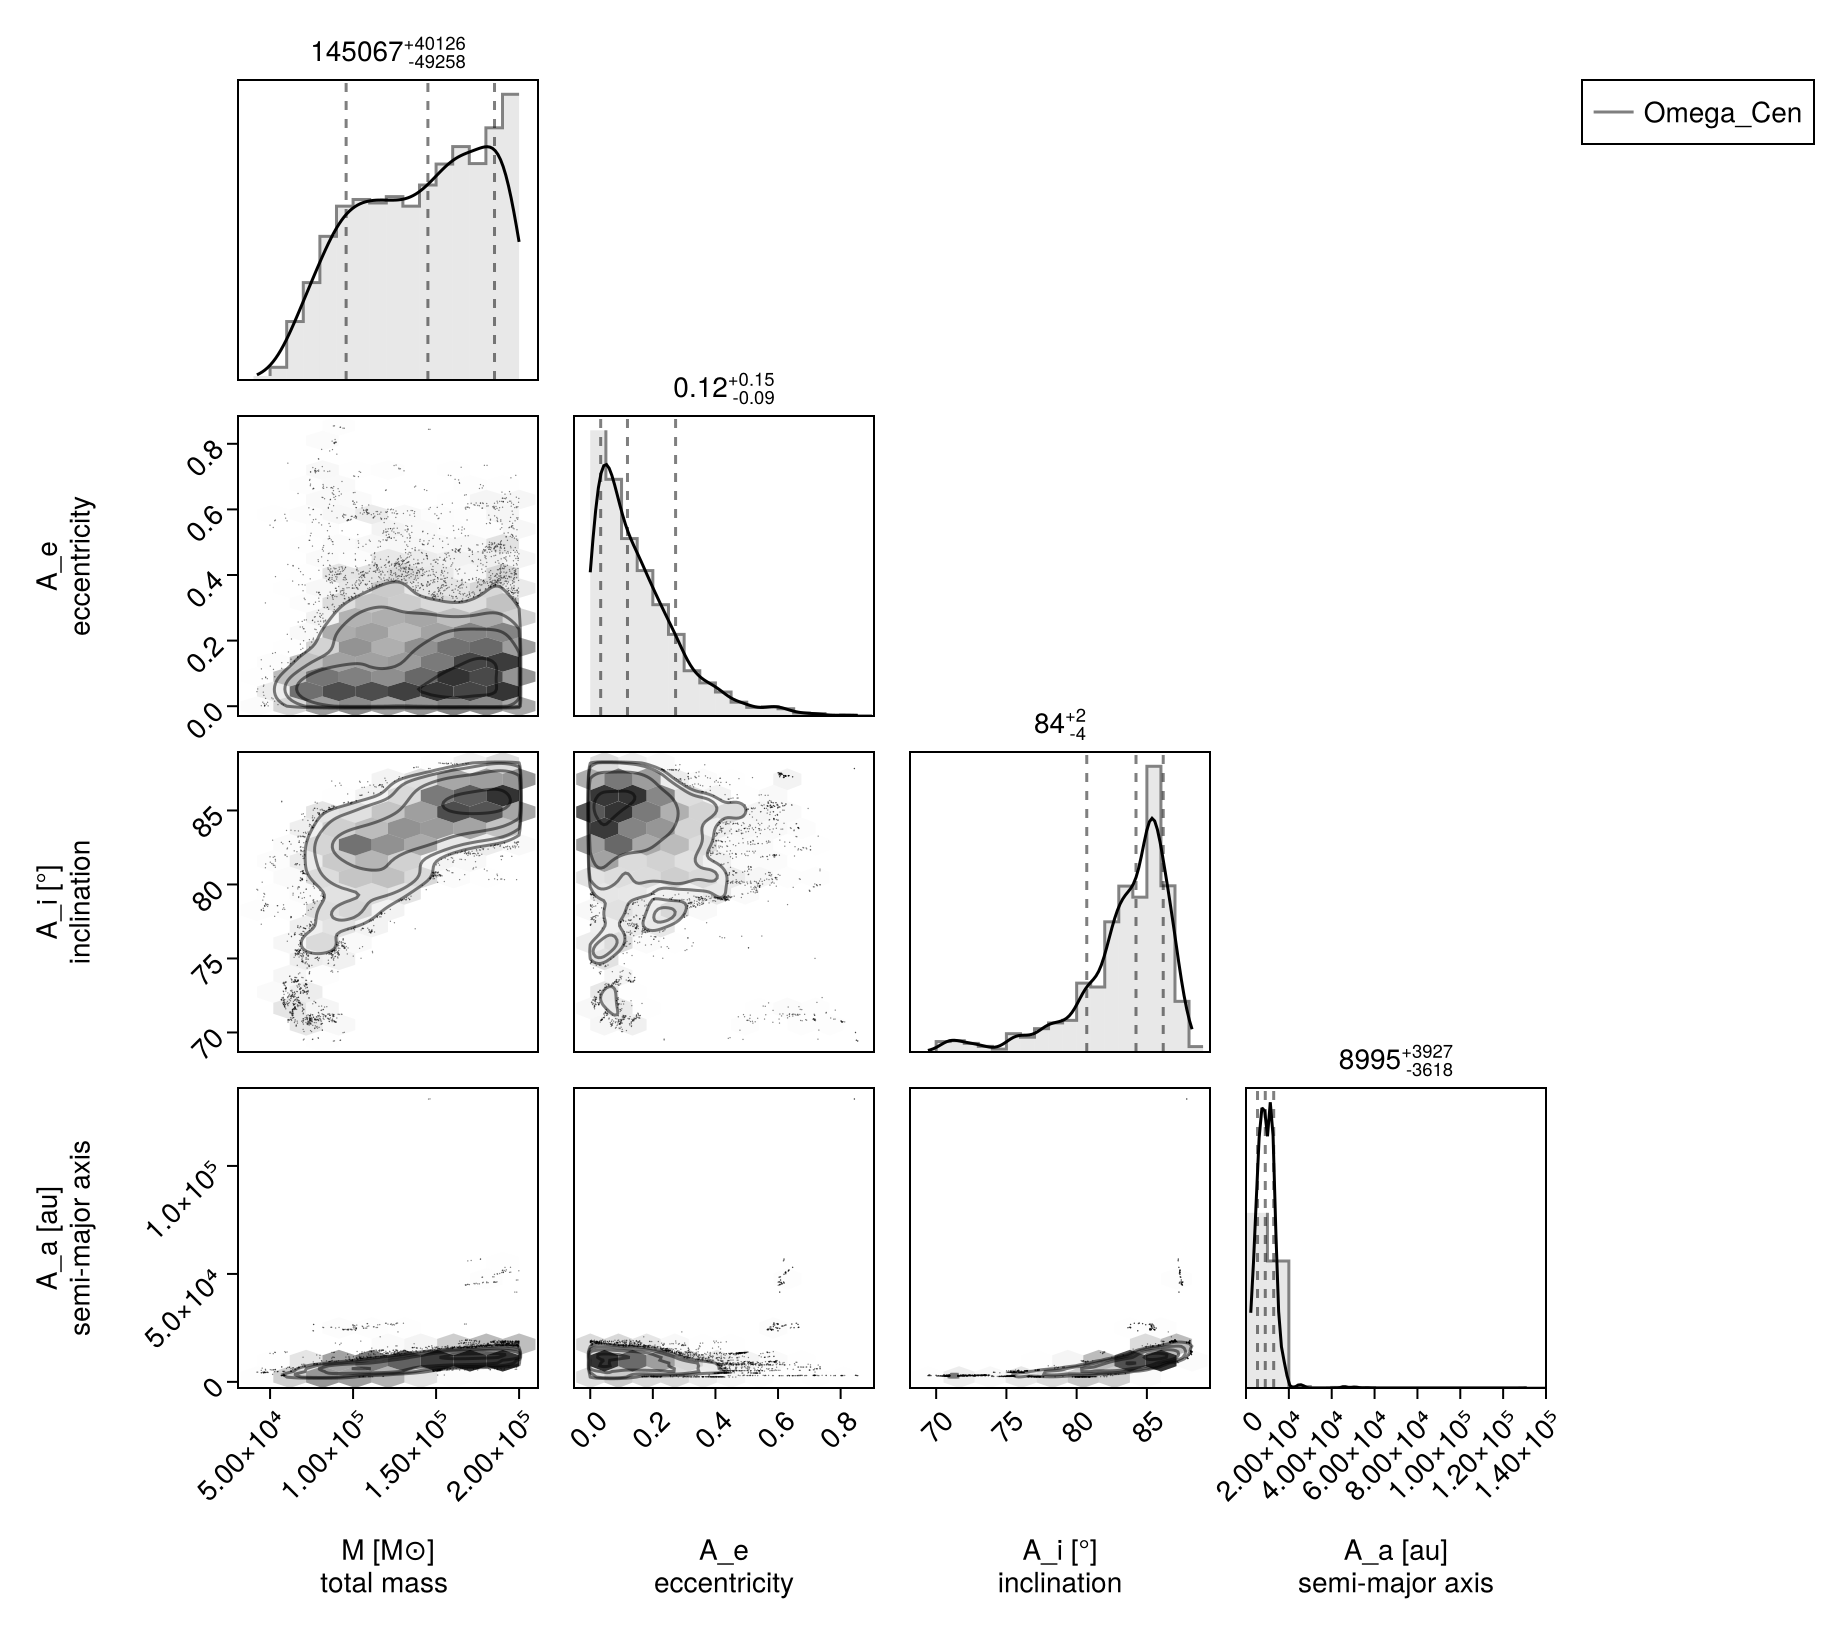

In [4]:
"""
Corner Plot
"""

corner_plot = octocorner(model, chain; small=true)

# Build filename 
corner_plot_name = "octo_corner"
#timestamp = Dates.format(now(), "yyyy-mm-dd_HH-MM-SS")
corner_filename = "C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\Plots\\$(corner_plot_name)_julia.png"

# save(filename, corner_plot)
corner_plot

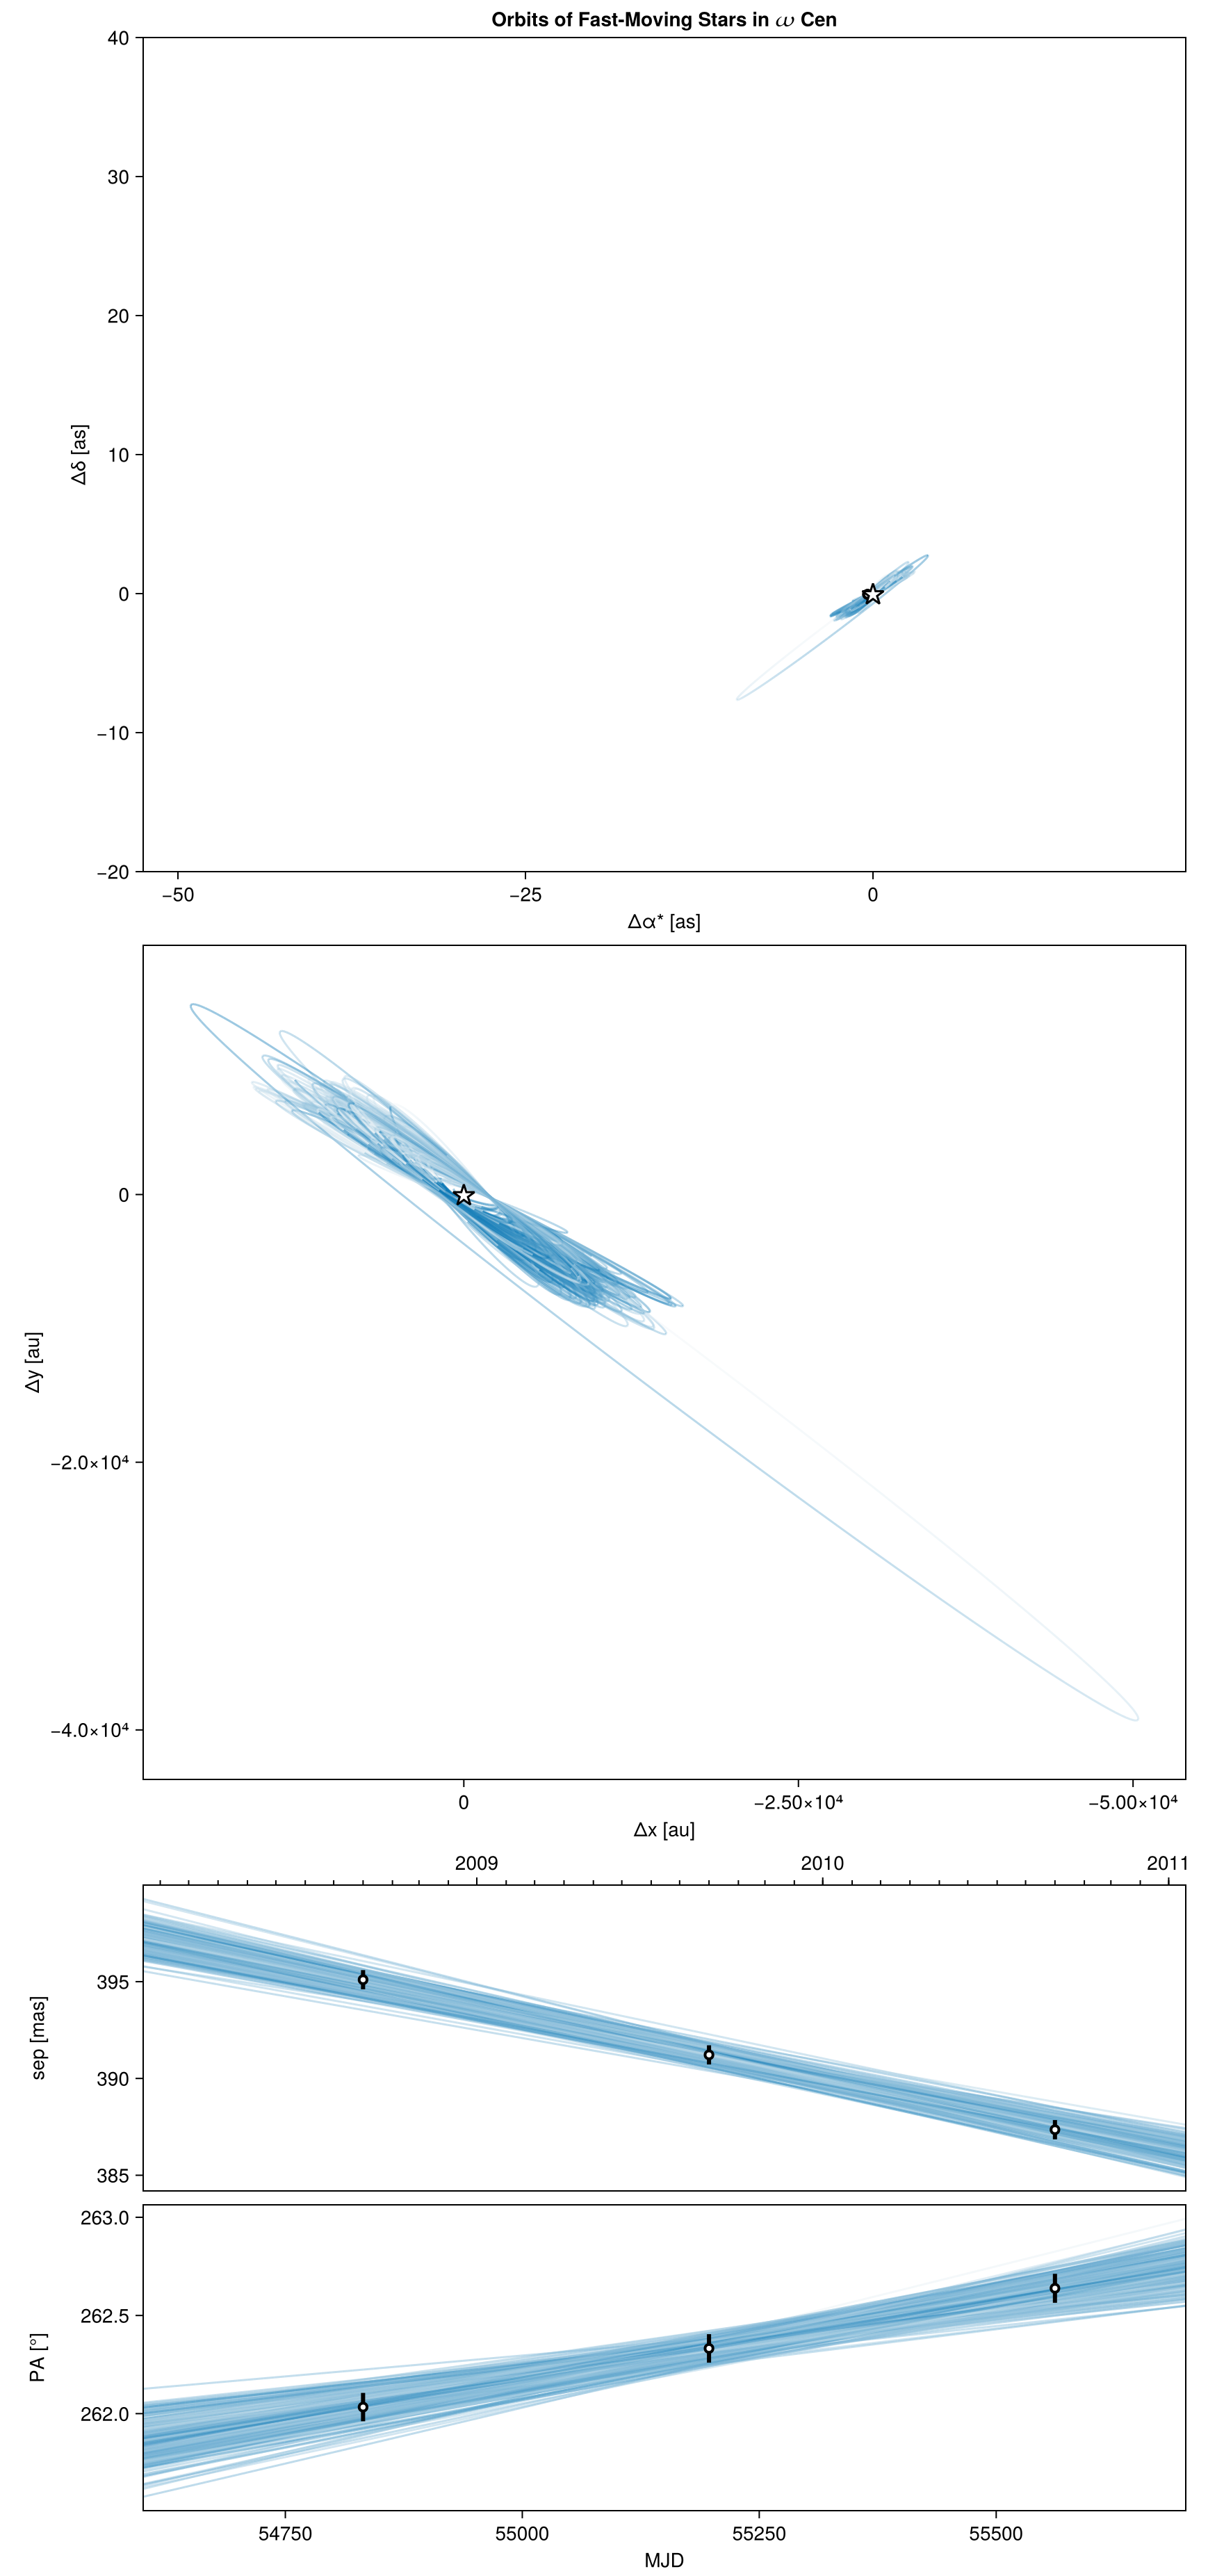

In [6]:
"""
Orbit Plot
"""

ts = Octofitter.range(54600, 55700, length=200) 
orbit_plot_3 = octoplot(model, chain; show_physical_orbit=true, colorbar=false, figscale=1.5, ts=ts)

# Access and modify specific axes
ax_orbit = orbit_plot_3.content[1]  # First axis (usually the orbit plot)
xlims!(ax_orbit, -50, 20)  # Set x-axis limits in mas
ylims!(ax_orbit, -20, 40)  # Set y-axis limits in mas

# Add a title
ax_orbit.title = "Orbits of Fast-Moving Stars in 𝜔 Cen"

# Build filename 
orbit_plot_name_3 = "octo_orbit_3"
#timestamp = Dates.format(now(), "yyyy-mm-dd_HH-MM-SS")
orbit_filename_3 = "C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\Plots\\$(orbit_plot_name_3)_Julia.png"

save(orbit_filename_3, orbit_plot_3)

orbit_plot_3


In [5]:
"""
Radial Velocity Data and Priors 
""" 

# K. O'Neil 2019 "Improving Orbit Estimates for Incomplete Orbits with a New Approach to Priors: with Applications from Black Holes to Planets".
# Supply Uniform priors on all Campbell orbital parameters and a Uniform prior on Period (not semi-major axis). 
# This period prior has a significant impact in the fit and recommendations for its range were not published in the original paper.
# Paper: https://arxiv.org/pdf/1809.05490

# Haberle et al. 2024 measured RVs:
# We could, however, obtain a line-of-sight velocity value for star E (vLOS = 261.7±
# 2.7km/s) and star F (vLOS = 232.5 ± 4.0km/s).

star_names = ["E", "F"]
epoch = 2010.0
epoch_mjd = Octofitter.years2mjd(epoch)
dt = 1.0
# Create a time array with three epochs: past, present, and future
epochs_years = [epoch - dt, epoch, epoch + dt]
# Convert the epochs from calendar years to Modified Julian Date (MJD)
epochs_mjd = [Octofitter.years2mjd(y) for y in epochs_years]


rv_dat_E = Table(
    epoch = epochs_mjd,
    rv    = fill(octo_utils_julia.stars["E"].rv, 3),
    σ_rv  = fill(octo_utils_julia.stars["E"].rv_err, 3),
)
rv_dat_F = Table(
    epoch = epochs_mjd,
    rv    = fill(octo_utils_julia.stars["F"].rv, 3),
    σ_rv  = fill(octo_utils_julia.stars["F"].rv_err, 3),
)
rv_likelihood_E = OctofitterRadialVelocity.PlanetRelativeRVLikelihood(
    rv_dat_E,
    name = "E",
    variables = @variables begin
            jitter ~ LogUniform(0.1, 1000) # m/s
        end)
rv_likelihood_F = OctofitterRadialVelocity.PlanetRelativeRVLikelihood(
    rv_dat_E,
    name = "E",
    variables = @variables begin
            jitter ~ LogUniform(0.1, 1000) # m/s
        end)



# Dictionaries to store simulation results and likelihood objects
epochs_mjd = Dict{String, Any}()
ra_rel = Dict{String, Any}()
dec_rel = Dict{String, Any}()
ra_errs = Dict{String, Any}()
dec_errs = Dict{String, Any}()
astrom_likelihoods = Dict{String, Any}()

# === 2. Simulate astrometry and create likelihood objects ===
for name in star_names
    star = octo_utils_julia.stars[name]

    emjd, ra_r, dec_r, ra_e, dec_e = octo_utils_julia.simulate_astrometry(star, epoch, dt)

    epochs_mjd[name] = emjd
    ra_rel[name] = ra_r
    dec_rel[name] = dec_r
    ra_errs[name] = ra_e
    dec_errs[name] = dec_e

    # Build tuple of observations, one per epoch
    obs = ntuple(i -> (
        epoch = emjd[i],
        ra = ra_r[i],
        dec = dec_r[i],
        σ_ra = ra_e[i],
        σ_dec = dec_e[i],
        cor = 0.0
    ), length(emjd))

    astrom_likelihoods[name] = PlanetRelAstromLikelihood(obs; name = name)
end


# === Define companions ===

rv_planet_5 = Planet(
    name = "E",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["E"]),rv_likelihood_E],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
    end
)

rv_planet_6 = Planet(
    name = "F",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["F"]), rv_likelihood_F],
    variables =@variables begin
        M = system.M
        P ~ Uniform(1, 200000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M) 
    end
)

Planet F
Derived:
  ω, Ω, θ, M, a, tp, 
Priors:
  P	Uniform{Float64}(a=1.0, b=200000.0)
  e	Uniform{Float64}(a=0.0, b=0.99)
  i	Sine()
  ωx	Normal{Float64}(μ=0.0, σ=1.0)
  ωy	Normal{Float64}(μ=0.0, σ=1.0)
  Ωx	Normal{Float64}(μ=0.0, σ=1.0)
  Ωy	Normal{Float64}(μ=0.0, σ=1.0)
  θx	Normal{Float64}(μ=0.0, σ=1.0)
  θy	Normal{Float64}(μ=0.0, σ=1.0)
ObsPriorAstromONeil2019 Table with 6 columns and 3 rows:
     epoch    ra       dec      σ_ra      σ_dec    cor
   ┌──────────────────────────────────────────────────
 1 │ 54832.0  3162.17  1105.98  0.500293  0.50026  0.0
 2 │ 55197.0  3162.6   1103.4   0.5       0.5      0.0
 3 │ 55562.0  3163.04  1100.82  0.500293  0.50026  0.0PlanetRelativeRVLikelihood Table with 3 columns and 3 rows:
     epoch    rv        σ_rv
   ┌──────────────────────────
 1 │ 54832.0  261700.0  2700.0
 2 │ 55197.0  261700.0  2700.0
 3 │ 55562.0  261700.0  2700.0Octofitter.UnitLengthPrior{:ωx, :ωy}: √(ωx^2+ωy^2) ~ LogNormal(log(1), 0.02)
Octofitter.UnitLengthPrior{:Ωx, :Ωy

[ Info: Preparing model
┌ Info: Determined number of free variables
└   D = 12


ℓπcallback(θ): 0.000019 seconds
∇ℓπcallback(θ): 0.000504 seconds (1 allocation: 32 bytes)


┌ Info: Determined number type
└   T = Float64
┌ Warning: This model has priors that cannot be sampled IID.
└ @ OctofitterPigeonsExt C:\Users\macke\.julia\packages\Octofitter\ljIIt\ext\OctofitterPigeonsExt\OctofitterPigeonsExt.jl:95
[ Info: Sampler running with multiple threads     : true
[ Info: Likelihood evaluated with multiple threads: false
┌ Info: Starting values not provided for all parameters! Guessing starting point using global optimization:
│   num_params = 12
└   num_fixed = 0
┌ Info: Found sample of initial positions
│   logpost_range = (-511.8225409344941, -500.297026801817)
└   mean_logpost = -503.3769606259378


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  scans     restarts      Λ        Λ_var      time(s)    allc(B)  log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2          0       5.79       5.17      0.862   9.44e+06  -1.71e+07          0      0.861          1          1 
        4          0       7.24       9.15      0.655   3.32e+05  -4.24e+03          0      0.793          1          1 
        8          0       8.01       12.5       1.23   6.27e+05       -400          0      0.741          1          1 
       16          0       10.7       14.4        3.2   1.06e+06       -313          0      0.682          1          1 
       32          0         14       16.6        4.8   1.45e+06       -333   1.75e-64      0.613          1          1 
       64          0       16.8 

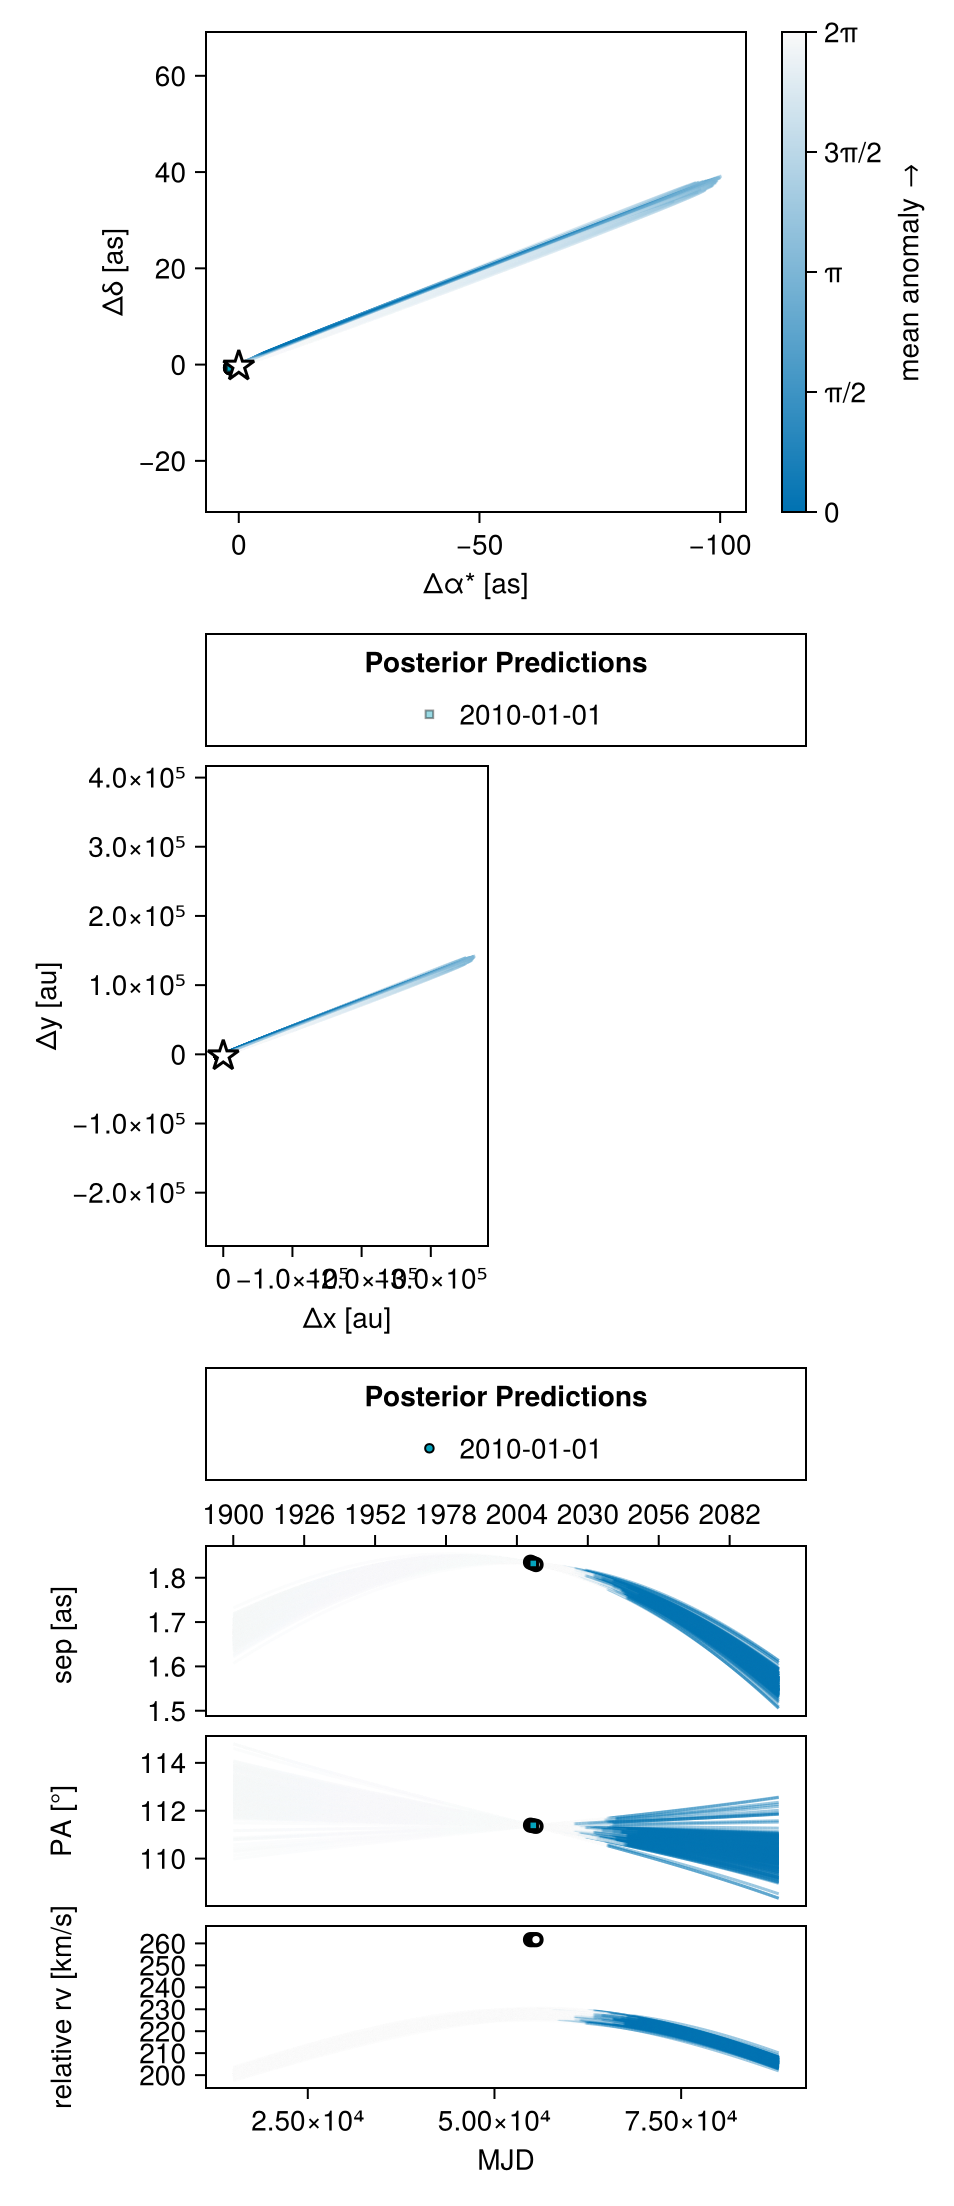

In [ ]:
"""
Radial Velocity Fit
""" 
sys = System(
    name = "Example-System",
    companions=[rv_planet_5],
    likelihoods=[],
    variables =@variables begin
        plx ~ truncated(Normal(0.19, 0.004), lower=0)  # Parallax [mas]
        M ~ Uniform(100, 200000)    # Host mass [solar masses]
    end
)

model = Octofitter.LogDensityModel(sys)

chain, pt = octofit_pigeons(model; n_rounds=12, n_chains=50, n_chains_variational=50)
println(chain)

octoplot(model, chain, show_physical_orbit=true, mark_epochs_mjd=[55197.0])

In [ ]:
"""
Loaded chain Data
"""
# === Select stars and time config ===
star_names = ["A", "B", "C", "D", "E", "F", "G"]
epoch = 2010.0
dt = 1.0

# Dictionaries to store simulation results and likelihood objects
epochs_mjd = Dict{String, Any}()
ra_rel = Dict{String, Any}()
dec_rel = Dict{String, Any}()
ra_errs = Dict{String, Any}()
dec_errs = Dict{String, Any}()
astrom_likelihoods = Dict{String, Any}()

# === Simulate astrometry and create likelihood objects ===
for name in star_names
    star = octo_utils_julia.stars[name]

    emjd, ra_r, dec_r, ra_e, dec_e = octo_utils_julia.simulate_astrometry(star, epoch, dt)

    epochs_mjd[name] = emjd
    ra_rel[name] = ra_r
    dec_rel[name] = dec_r
    ra_errs[name] = ra_e
    dec_errs[name] = dec_e

    # Build tuple of observations, one per epoch
    obs = ntuple(i -> (
        epoch = emjd[i],
        ra = ra_r[i],
        dec = dec_r[i],
        σ_ra = ra_e[i],
        σ_dec = dec_e[i],
        cor = 0.0
    ), length(emjd))

    astrom_likelihoods[name] = PlanetRelAstromLikelihood(obs; name = name)
end

planet_1 = Planet(
    name = "A",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["A"])],
    variables = @variables begin
        M = system.M
        P ~ Uniform(100, 2000000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
    end
)
planet_3 = Planet(
    name = "C",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["C"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(100, 2000000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M) 
    end
)

planet_4 = Planet(
    name = "D",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["D"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(100, 2000000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()                     # Inclination [rad]
        ω ~ UniformCircular()          # Argument of periastron [rad]
        Ω ~ UniformCircular()          # Longitude of ascending node [rad]
        θ ~ UniformCircular()          # Mean anomaly at reference epoch [rad]
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)
    end
)

planet_5 = Planet(
    name = "E",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["E"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(100, 2000000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()
        ω ~ UniformCircular()
        Ω ~ UniformCircular()
        θ ~ UniformCircular()
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω,M=M)  
    end
)

planet_6 = Planet(
    name = "F",
    basis = Visual{KepOrbit},
    likelihoods = [ObsPriorAstromONeil2019(astrom_likelihoods["F"])],
    variables =@variables begin
        M = system.M
        P ~ Uniform(100, 2000000)         # Period in yrs
        a = cbrt(M * P^2)     # Semi-Major axis in AU
        e ~ Uniform(0.0, 0.99)         # Eccentricity
        i ~ Sine()
        ω ~ UniformCircular()
        Ω ~ UniformCircular()
        θ ~ UniformCircular()
        tp = θ_at_epoch_to_tperi(θ, 55197.0; a=a, e=e, i=i, ω=ω, Ω=Ω, M=M)  
    end
)

system_load = System(
    name = "Omega_Cen",
    likelihoods = [],
    companions = [planet_1,planet_3, planet_4, planet_5, planet_6],
    variables = @variables begin
        plx ~ truncated(Normal(0.19, 0.004), lower=0)  # Parallax [mas]
        M ~ Uniform(100, 200000)    # Host mass [solar masses]
    end
)

# === Model ===
model_load = Octofitter.LogDensityModel(system_load)

chain_load = Octofitter.loadchain(raw"C:\Users\macke\OneDrive - Saint Marys University\Summer Research 2025\octo_orbit\18_rounds_ACDEF_chain")

ℓπcallback(θ): 0.000034 seconds
∇ℓπcallback(θ): 0.000969 seconds (6 allocations: 170.031 KiB)


[ Info: Preparing model
┌ Info: Determined number of free variables
└   D = 47
┌ Info: Determined number type
└   T = Float64


Chains MCMC chain (262144×81×1 Array{Float64, 3}):

Iterations        = 1:1:262144
Number of chains  = 1
Samples per chain = 262144
Wall duration     = 76513.47 seconds
Compute duration  = 76513.47 seconds
parameters        = loglike, logprior, logpost, pigeons_logpotential, plx, M, A_P, A_e, A_i, A_ωx, A_ωy, A_Ωx, A_Ωy, A_θx, A_θy, A_ω, A_Ω, A_θ, A_M, A_a, A_tp, C_P, C_e, C_i, C_ωx, C_ωy, C_Ωx, C_Ωy, C_θx, C_θy, C_ω, C_Ω, C_θ, C_M, C_a, C_tp, D_P, D_e, D_i, D_ωx, D_ωy, D_Ωx, D_Ωy, D_θx, D_θy, D_ω, D_Ω, D_θ, D_M, D_a, D_tp, E_P, E_e, E_i, E_ωx, E_ωy, E_Ωx, E_Ωy, E_θx, E_θy, E_ω, E_Ω, E_θ, E_M, E_a, E_tp, F_P, F_e, F_i, F_ωx, F_ωy, F_Ωx, F_Ωy, F_θx, F_θy, F_ω, F_Ω, F_θ, F_M, F_a, F_tp

Summary Statistics
            parameters           mean           std        mcse      ess_bulk  ⋯
                Symbol        Float64       Float64     Float64       Float64  ⋯

               loglike        52.5491        4.9084      0.0337    19668.6779  ⋯
              logprior       -84.0487      

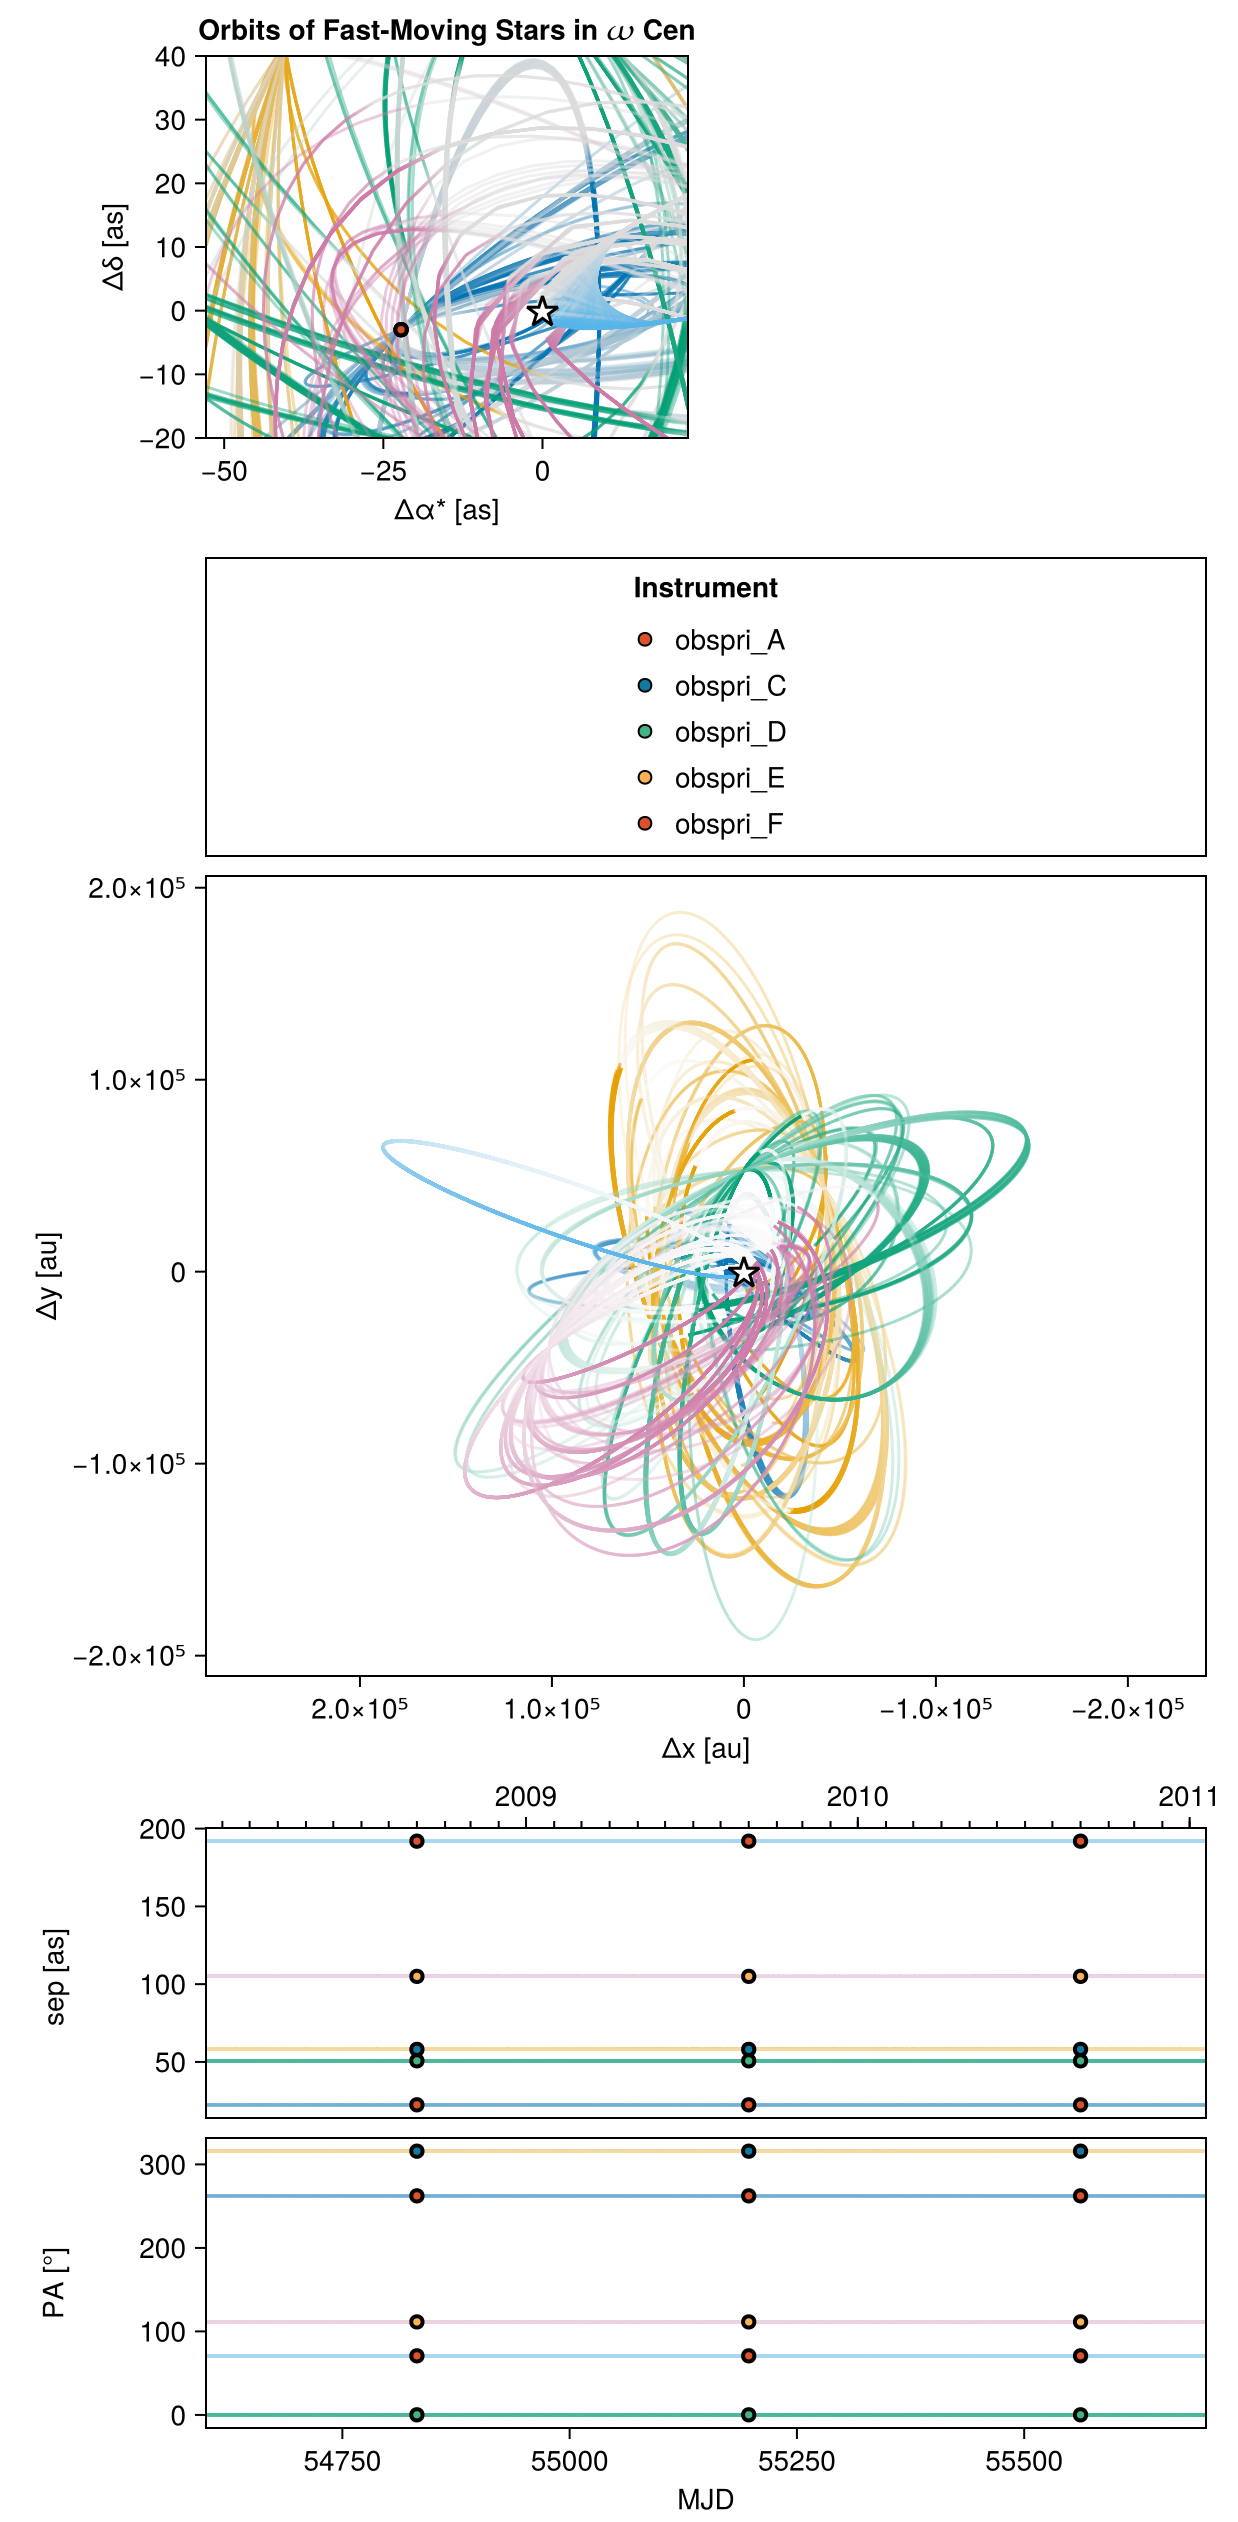

In [ ]:
"""
Loaded chain orbit plot
"""

ts = Octofitter.range(54600, 55700, length=200) 
orbit_plot_3 = octoplot(model_16, chain_load; show_physical_orbit=true, colorbar=false, figscale=1, ts=ts)

# Access and modify specific axes
ax_orbit = orbit_plot_3.content[1]  # First axis (usually the orbit plot)
xlims!(ax_orbit, -50, 20)  # Set x-axis limits in mas
ylims!(ax_orbit, -20, 40)  # Set y-axis limits in mas

# Add a title
ax_orbit.title = "Orbits of Fast-Moving Stars in 𝜔 Cen"

# Build filename 
orbit_plot_name_3 = "orbit_loaded_chain"
#timestamp = Dates.format(now(), "yyyy-mm-dd_HH-MM-SS")
orbit_filename_3 = "C:\\Users\\macke\\OneDrive - Saint Marys University\\Summer Research 2025\\Plots\\$(orbit_plot_name_3)_Julia.png"

save(orbit_filename_3, orbit_plot_3)

orbit_plot_3


In [ ]:
"""
Radial Velocities for loaded chain
""" 

"""
You can convert the chains into orbit objects via orbs = ctofitter.construct_elements(model, chain, :b, :)
That gives a list of orbit objects for the star "b" , that you can query about different properties at different times.
You can get their rvs in m/s relative to the primary via radvel(orbs[1], mjd("2026-01-01")) (looping over orbs to get calculate an average and std)

Haberle et al. 2024 measured RVs:
We could, however, obtain a line-of-sight velocity value for star E (vLOS = 261.7±
2.7km/s) and star F (vLOS = 232.5 ± 4.0km/s).

R_v of Omega Cen: 232.78 ± 0.21 km/s
"""



# --- Function to get RVs for a star (km/s) ---
function rv_for_star_kms(model, chain, star::Symbol, epoch_mjd::Float64)
    orbs = Octofitter.construct_elements(model, chain, star, :)
    rvs_kms = [Octofitter.radvel(o, epoch_mjd)/1000.0 for o in orbs]  # convert m/s → km/s
    return mean(rvs_kms), std(rvs_kms)
end

# --- Stars and epoch ---
stars = [:A, :C, :D, :E, :F]
central_epoch = 55197.0

# --- Build table ---
table_term = Matrix{String}(undef, length(stars), 3)
table_tex  = Matrix{String}(undef, length(stars), 3)

for (i, star) in enumerate(stars)
    mean_rv, std_rv = rv_for_star_kms(model_16, chain_16, star, central_epoch)
    table_term[i, :] = [
        string(star),
        string(central_epoch),
        @sprintf("%.3f ± %.3f", mean_rv, std_rv)
    ]
end

header = ["Star", "Epoch (MJD)", "RV (km/s)"]

# --- Display terminal table ---
println("Terminal table:")
pretty_table(table_term; header=header)

# --- Latex Table --- 
println("\\begin{tabular}{rrr}")
println("  \\hline")
println("  \\textbf{Star} & \\textbf{Epoch (MJD)} & \\textbf{RV (km/s)} \\\\ \\hline")

for star in stars
    mean_rv, std_rv = rv_for_star_kms(model_load, chain_load, star, central_epoch)
    println("  $(star) & $(central_epoch) & \$$(round(mean_rv,digits=3)) \\pm $(round(std_rv,digits=3))\$ \\\\")
end

println("  \\hline")
println("\\end{tabular}")



Terminal table:
┌──────┬─────────────┬─────────────────┐
│ Star │ Epoch (MJD) │       RV (km/s) │
├──────┼─────────────┼─────────────────┤
│    A │     55197.0 │ 28.385 ± 43.665 │
│    C │     55197.0 │ -8.091 ± 39.963 │
│    D │     55197.0 │ -0.370 ± 25.334 │
│    E │     55197.0 │ 22.831 ± 19.500 │
│    F │     55197.0 │ -1.630 ± 24.514 │
└──────┴─────────────┴─────────────────┘
\begin{tabular}{rrr}
  \hline
  \textbf{Star} & \textbf{Epoch (MJD)} & \textbf{RV (km/s)} \\ \hline
  A & 55197.0 & $28.385 \pm 43.665$ \\
  C & 55197.0 & $-8.091 \pm 39.963$ \\
  D & 55197.0 & $-0.37 \pm 25.334$ \\
  E & 55197.0 & $22.831 \pm 19.5$ \\
  F & 55197.0 & $-1.63 \pm 24.514$ \\
  \hline
\end{tabular}


In [ ]:
"""
Best Fit Parameters Table for 16_n_rounds chain
"""

# --- summarize_param ---
function summarize_param(chain, paramname::String)
    vals = vec(Array(chain[paramname]))
    med  = median(vals)
    lo   = quantile(vals, 0.16)
    hi   = quantile(vals, 0.84)
    return med, med - lo, hi - med
end

stars = ["A","C","D","E","F"]

# --- matrices ---
table_term = Matrix{String}(undef, length(stars), 4)
table_tex  = Matrix{String}(undef, length(stars), 4)

for (i, s) in enumerate(stars)
    e_med, e_lo, e_hi = summarize_param(chain_16, "$(s)_e")
    i_med, i_lo, i_hi = summarize_param(chain_16, "$(s)_i")
    i_med, i_lo, i_hi = rad2deg.( (i_med, i_lo, i_hi) )  # convert radians → degrees
    a_med, a_lo, a_hi = summarize_param(chain_16, "$(s)_a")

    # Terminal table
    table_term[i, :] = [
        s,
        @sprintf("%.2g (−%.2g/+%.2g)", e_med, e_lo, e_hi),
        @sprintf("%.2g (−%.2g/+%.2g)", i_med, i_lo, i_hi),
        @sprintf("%.2g (−%.2g/+%.2g)", a_med, a_lo, a_hi)
    ]

    # LaTeX table
    table_tex[i, :] = [
        s,
        "\$" * @sprintf("%.2g_{-%.2g}^{+%.2g}", e_med, e_lo, e_hi) * "\$",
        "\$" * @sprintf("%.2g_{-%.2g}^{+%.2g}", i_med, i_lo, i_hi) * "\$",
        "\$" * @sprintf("%.2g_{-%.2g}^{+%.2g}", a_med, a_lo, a_hi) * "\$"
    ]
end

header = ["Star", "Eccentricity (e)", "Inclination (°)", "Semi-major axis (AU)"]

# --- Terminal table ---
pretty_table(table_term; header = header)

# --- LaTeX table ---
println("\nLaTeX table:")
println("\\begin{tabular}{lrrr}")
println("  \\hline")
println("  \\textbf{Star} & \\textbf{Eccentricity (e)} & \\textbf{Inclination (°)} & \\textbf{Semi-major axis (AU)} \\\\ \\hline")
for row in eachrow(table_tex)
    println("  ", join(row, " & "), " \\\\")
end
println("  \\hline")
println("\\end{tabular}")



┌──────┬──────────────────────────┬───────────────────────┬─────────────────────────────┐
│ Star │         Eccentricity (e) │       Inclination (°) │        Semi-major axis (AU) │
├──────┼──────────────────────────┼───────────────────────┼─────────────────────────────┤
│    A │       0.42 (−0.33/+0.18) │        76 (−3.4/+5.2) │ 4.7e+04 (−1.9e+04/+3.9e+04) │
│    C │       0.15 (−0.12/+0.25) │            65 (−4/+2) │       1e+05 (−1e+04/+3e+04) │
│    D │       0.37 (−0.16/+0.23) │         72 (−27/+4.6) │ 1.1e+05 (−2.7e+04/+1.4e+04) │
│    E │     0.92 (−0.22/+0.0092) │      1.5e+02 (−14/+9) │ 9.4e+04 (−2.9e+04/+4.7e+03) │
│    F │ 0.99 (−4.6e-05/+2.1e-05) │ 1.8e+02 (−0.31/+0.24) │           1e+05 (−2.3/+1.1) │
└──────┴──────────────────────────┴───────────────────────┴─────────────────────────────┘

LaTeX table:
\begin{tabular}{lrrr}
  \hline
  \textbf{Star} & \textbf{Eccentricity (e)} & \textbf{Inclination (°)} & \textbf{Semi-major axis (AU)} \\ \hline
  A & $0.42_{-0.33}^{+0.18}$ & $